<a href="https://colab.research.google.com/github/ajai-cr7/LearnFaster/blob/main/Copy_of_web_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone repo

 github
 

see https://github.com/dhanushya08/pix2code

In [1]:
!git clone https://github.com/dhanushya08/pix2code

Cloning into 'pix2code'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 222 (delta 16), reused 0 (delta 0), pack-reused 183
Receiving objects: 100% (222/222), 1.17 GiB | 26.15 MiB/s, done.
Resolving deltas: 100% (97/97), done.
Checking out files: 100% (46/46), done.


# Install dependencies

In [2]:
#!pip install -r  requirements.txt

# Prepare the data:



In [3]:
# reassemble and unzip the data
%cd /content/pix2code/datasets
!zip -F pix2code_datasets.zip --out datasets.zip
!unzip datasets.zip

Streaming output truncated to the last 5000 lines.
  inflating: ios/all_data/8F206C4B-53B6-4FBA-AC56-1FC560C480FB.gui  
  inflating: ios/all_data/8F206C4B-53B6-4FBA-AC56-1FC560C480FB.png  
  inflating: ios/all_data/8F434736-9E6D-402A-AB22-EE4B68CECBF6.gui  
  inflating: ios/all_data/8F434736-9E6D-402A-AB22-EE4B68CECBF6.png  
  inflating: ios/all_data/8F449DE8-075E-4D35-A668-69E58472BDA8.gui  
  inflating: ios/all_data/8F449DE8-075E-4D35-A668-69E58472BDA8.png  
  inflating: ios/all_data/8F45B47A-DCAE-45CE-B5DC-45F7DEE67257.gui  
  inflating: ios/all_data/8F45B47A-DCAE-45CE-B5DC-45F7DEE67257.png  
  inflating: ios/all_data/8F5151AC-1C44-4221-86D1-4C7BA42F0632.gui  
  inflating: ios/all_data/8F5151AC-1C44-4221-86D1-4C7BA42F0632.png  
  inflating: ios/all_data/8F7265DE-F6DC-4BC2-85C4-B1CE8D63849B.gui  
  inflating: ios/all_data/8F7265DE-F6DC-4BC2-85C4-B1CE8D63849B.png  
  inflating: ios/all_data/8F8623B1-07D8-4066-AA9C-ED64D30960FC.gui  
  inflating: ios/all_data/8F8623B1-07D8-4066-AA9C-ED

Splitting training and test dataset.

In [4]:
%cd /content/pix2code/model

# split training set and evaluation set while ensuring no training example in the evaluation set
# usage: build_datasets.py <input path> <distribution (default: 6)>
!./build_datasets.py ../datasets/ios/all_data
!./build_datasets.py ../datasets/android/all_data
!./build_datasets.py ../datasets/web/all_data

# transform images (normalized pixel values and resized pictures) in training dataset to numpy arrays (smaller files if you need to upload the set to train your model in the cloud)
# usage: convert_imgs_to_arrays.py <input path> <output path>
!./convert_imgs_to_arrays.py ../datasets/ios/training_set ../datasets/ios/training_features
!./convert_imgs_to_arrays.py ../datasets/android/training_set ../datasets/android/training_features
!./convert_imgs_to_arrays.py ../datasets/web/eval_set ../datasets/web/training_features

/content/pix2code/model
Splitting datasets, training samples: 1499.142857142857, evaluation samples: 249.85714285714286
Training dataset: ../datasets/ios/training_set
Evaluation dataset: ../datasets/ios/eval_set
Splitting datasets, training samples: 1495.7142857142858, evaluation samples: 249.28571428571428
Training dataset: ../datasets/android/training_set
Evaluation dataset: ../datasets/android/eval_set
Splitting datasets, training samples: 1493.142857142857, evaluation samples: 248.85714285714286
Training dataset: ../datasets/web/training_set
Evaluation dataset: ../datasets/web/eval_set
Converting images to numpy arrays...
Numpy arrays saved in ../datasets/ios/training_features
Converting images to numpy arrays...
Numpy arrays saved in ../datasets/android/training_features
Converting images to numpy arrays...
Numpy arrays saved in ../datasets/web/training_features


# Train the model:



In [ ]:
%mkdir /content/pix2code/bin
%cd /content/pix2code/model

/content/pix2code/model


<h3>Mounting Google Drive </h3>



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!mkdir '/content/gdrive/My Drive/tmp/pix2code_model'

mkdir: cannot create directory ‘/content/gdrive/My Drive/tmp/pix2code_model’: File exists


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<strong><font size="3" color="red">Traning the Model</font></strong>

In [ ]:
# provide input path to training data and output path to save trained model and metadata
# usage: train.py <input path> <output path> <is memory intensive (default: 0)> <pretrained weights (optional)>
# !./train.py ../datasets/web/training_set ../bin

# train on images pre-processed as arrays
#!./train.py ../datasets/web/training_features ../bin

# train with generator to avoid having to fit all the data in memory (RECOMMENDED)
#!./train.py ../datasets/web/training_features ../bin 1 
!./train.py ../datasets/web/training_features '/content/gdrive/My Drive/tmp/pix2code_model' 1

# train on top of pretrained weights
#!./train.py ../datasets/web/training_features ../bin 1 ../bin/pix2code.h5

2021-04-18 08:50:45.095037: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-18 08:50:46.631808: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-18 08:50:46.632690: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-18 08:50:46.662446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-18 08:50:46.663010: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-04-18 08:50:46.663044: I tensorflow/stream_executor/platform/default/dso_loade

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp -R '/content/gdrive/My Drive/tmp/pix2code_model' /content/pix2code/
!rm -rf /content/pix2code/bin
!mv /content/pix2code/pix2code_model /content/pix2code/bin
#!ls /content/pix2code/bin

## Generate code for batch of GUIs:



In [ ]:
!mkdir /content/pix2code/model/gui_screenshots
%cd /content/pix2code/model/gui_screenshots

!wget  https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/00CDC9A8-3D73-4291-90EF-49178E408797.png -O 00CDC9A8-3D73-4291-90EF-49178E408797.png
!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/0173F54E-D99E-43E6-A6B0-B9087837E36A.png -O 0173F54E-D99E-43E6-A6B0-B9087837E36A.png
!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/01D23C26-B39F-475F-9961-9DAFF0B987A3.png -O 01D23C26-B39F-475F-9961-9DAFF0B987A3.png
!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/042B145D-1E0D-47CB-B16C-7F49B64DFF53.png -O 042B145D-1E0D-47CB-B16C-7F49B64DFF53.png
!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/0C8D1647-C0B7-43A3-AB68-AB4F8D7DC234.png -O 0C8D1647-C0B7-43A3-AB68-AB4F8D7DC234.png
!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/3FFBB381-17C9-4078-B038-E2CA2F200BA7.png -O 3FFBB381-17C9-4078-B038-E2CA2F200BA7.png
  
!wget https://raw.githubusercontent.com/ashnkumar/sketch-code/master/examples/drawn_example1.png -O drawn_example1.png
!wget https://raw.githubusercontent.com/ashnkumar/sketch-code/master/examples/drawn_example2.png -O drawn_example2.png
!wget https://raw.githubusercontent.com/ashnkumar/sketch-code/master/examples/drawn_example3.png -O drawn_example3.png
    
!ls

Coverting png to gui:

In [ ]:
!mkdir /content/pix2code/code
%cd /content/pix2code/model
     
# generate DSL code (.gui file), the default search method is greedy
# usage: generate.py <trained weights path> <trained model name> <input image> <output path> <search method (default: greedy)>
#./generate.py ../bin pix2code ../gui_screenshots ../code

# equivalent to command above
#./generate.py ../bin pix2code ../gui_screenshots ../code greedy

# generate DSL code with beam search and a beam width of size 3
#!./generate.py ../bin pix2code ../gui_screenshots ../code 3

!./generate.py ../bin pix2code /content/pix2code/model/gui_screenshots/ ../code 3

In [ ]:
!ls ../code

# Generate code for a single GUI image:



In [ ]:
#!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/00CDC9A8-3D73-4291-90EF-49178E408797.png -O /content/pix2code/test_gui.png
!wget https://raw.githubusercontent.com/ashnkumar/sketch-code/master/examples/drawn_example1.png -O /content/pix2code/test_gui.png

--2021-05-20 06:05:29--  https://raw.githubusercontent.com/ashnkumar/sketch-code/master/examples/drawn_example1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 660218 (645K) [image/png]
Saving to: ‘/content/pix2code/test_gui.png’

/content/pix2code/t 100%[===================>] 644.74K  --.-KB/s    in 0.02s   

2021-05-20 06:05:29 (28.3 MB/s) - ‘/content/pix2code/test_gui.png’ saved [660218/660218]



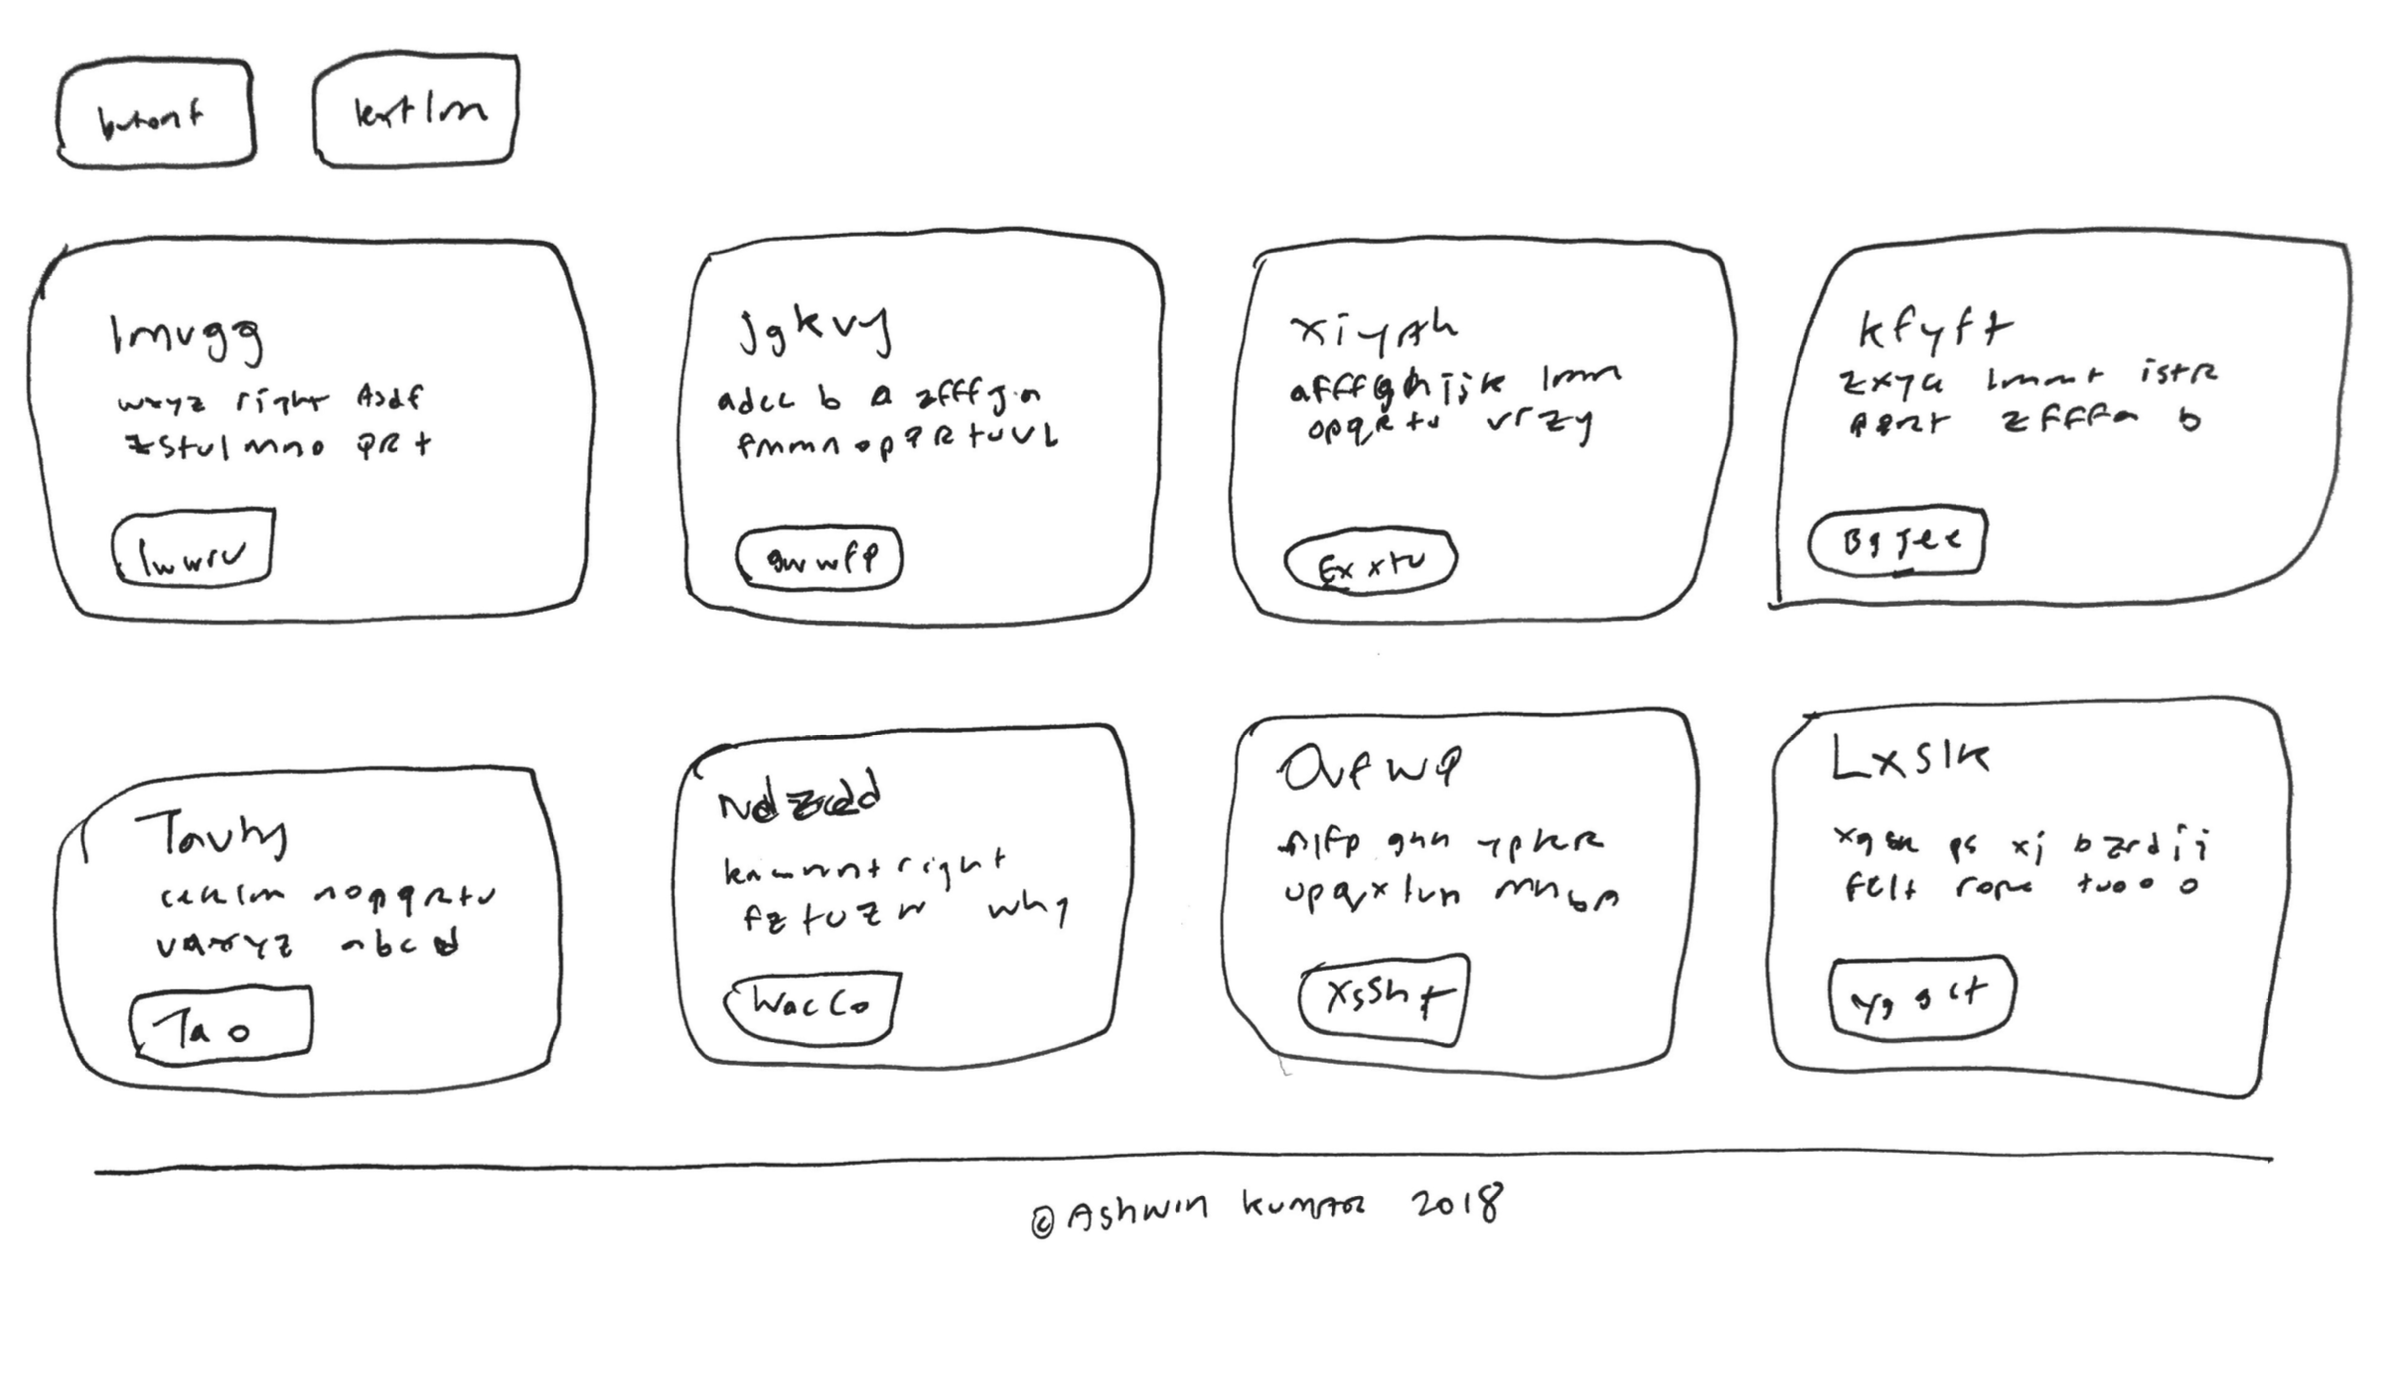

In [ ]:
import PIL.Image 
from IPython.display import Image
gui_image = '/content/pix2code/test_gui.png'
im = PIL.Image .open(gui_image)
w, h = im.size
Image(filename='/content/pix2code/test_gui.png' ,width=int(w/3), height=int(h/3) )

In [ ]:
!mkdir /content/pix2code/code
%cd /content/pix2code/model

# generate DSL code (.gui file), the default search method is greedy
# usage: sample.py <trained weights path> <trained model name> <input image> <output path> <search method (default: greedy)>
#./sample.py ../bin pix2code ../test_gui.png ../code

# equivalent to command above
#./sample.py ../bin pix2code ../test_gui.png ../code greedy

# generate DSL code with beam search and a beam width of size 3
!./sample.py ../bin pix2code ../test_gui.png ../code 3

/content/pix2code/model
2021-05-20 04:47:48.002298: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-20 04:47:50.018665: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-20 04:47:50.019913: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-20 04:47:50.083663: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-20 04:47:50.084567: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-05-20 04:47:50.084612: I tensorflow/stream_executor

# Compiler

Convert DSL to HTML:

In [ ]:
%cd /content/pix2code/compiler

# compile .gui file to Android XML UI
#./android-compiler.py <input file path>.gui

# compile .gui file to iOS Storyboard
#./ios-compiler.py <input file path>.gui

# compile .gui file to HTML/CSS (Bootstrap style)
!./web-compiler.py /content/pix2code/code/test_gui.gui

!ls /content/pix2code/code

/content/pix2code/compiler
test_gui.gui  test_gui.html


In [ ]:
from IPython.display import HTML
HTML(filename='/content/pix2code/code/test_gui.html') 

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


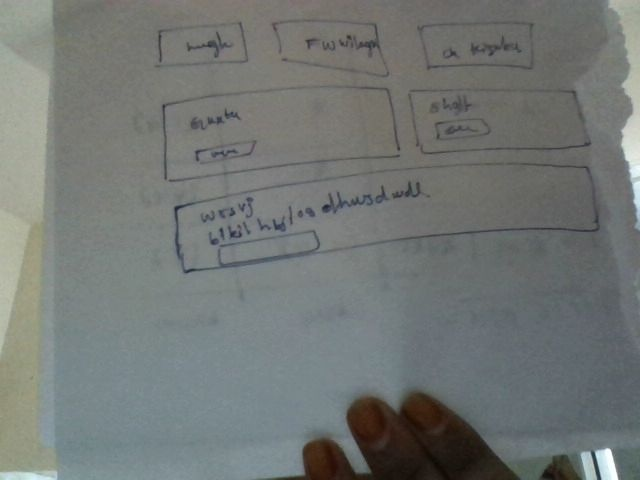

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
%cd /content/pix2code/model

# generate DSL code (.gui file), the default search method is greedy
# usage: sample.py <trained weights path> <trained model name> <input image> <output path> <search method (default: greedy)>
#./sample.py ../bin pix2code ../test_gui.png ../code

# equivalent to command above
#./sample.py ../bin pix2code ../test_gui.png ../code greedy

# generate DSL code with beam search and a beam width of size 3
!cp /content/saved_img.jpg /content/pix2code
!./sample.py ../bin pix2code ../saved_img.jpg ../code 3

/content/pix2code/model
2021-05-20 06:20:44.093572: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-20 06:20:46.070004: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-20 06:20:46.070980: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-20 06:20:46.077032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-20 06:20:46.077798: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-05-20 06:20:46.077840: I tensorflow/stream_executor

In [ ]:
%cd /content/pix2code/compiler

# compile .gui file to Android XML UI
#./android-compiler.py <input file path>.gui

# compile .gui file to iOS Storyboard
#./ios-compiler.py <input file path>.gui

# compile .gui file to HTML/CSS (Bootstrap style)
!./web-compiler.py /content/pix2code/code/saved_img.gui

!ls /content/pix2code/code

/content/pix2code/compiler
saved_img.gui  saved_img.html  test_gui.gui  test_gui.html


In [ ]:
from IPython.display import HTML
HTML(filename='/content/pix2code/code/saved_img.html')

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

original_gui = load_doc('/content/pix2code/test_gui.png')
original_gui = ' '.join(original_gui.split())
original_gui = original_gui.replace(',', ' ,')
original_gui = original_gui.split()


# Predicted images don't have color so we normalize all buttons to btn-orange or btn-active
btns_to_replace = ['btn-green', 'btn-red']
normalized_original_gui = ['btn-orange' if token in btns_to_replace else token for token in original_gui]
normalized_original_gui = ['btn-active' if token == 'btn-inactive' else token for token in normalized_original_gui]

generated_gui = predicted.split()

normalized_generated_gui = ['btn-orange' if token in btns_to_replace else token for token in generated_gui]
normalized_generated_gui = ['btn-active' if token == 'btn-inactive' else token for token in normalized_generated_gui]

In [ ]:
print(blue_score)

0.789
